In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

sns.set_style()

# Exploracion de datos

In [3]:
train_dir = "data/Train.xlsx"

data = pd.read_excel(train_dir)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,240000,2,2,2,37,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1,240000,2,3,1,43,0,0,0,0,0,...,65130,66494,67441,2300,2400,2329,2411,2050,2000,0
2,40000,2,1,2,24,0,0,0,0,0,...,37263,35224,34111,5000,8017,7000,4000,5000,5000,1
3,360000,1,1,2,29,-2,-2,-2,-2,-2,...,3466,1630,2931,2358,3788,3483,1638,2946,16950,0
4,130000,1,1,2,27,0,0,0,0,0,...,35194,35951,36703,1867,1872,1256,1500,1500,1500,0


In [4]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
data = data.rename(columns={"default.payment.next.month":"default", "PAY_0":"PAY_1"})

In [6]:
gr = data.groupby("default")[["LIMIT_BAL"]].count()
gr["pct"] = gr["LIMIT_BAL"]/gr["LIMIT_BAL"].sum()
gr

,LIMIT_BAL,pct
default,,
0,18690,0.778782
1,5309,0.221218


Las clases no estan desbalanceadas

In [7]:
XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="default"), data["default"], test_size=0.2, random_state=7)

In [8]:
data_train = pd.concat([XTrain,yTrain],axis=1)
gr = data_train.groupby("default")[["LIMIT_BAL"]].count()
gr["pct"] = gr["LIMIT_BAL"]/gr["LIMIT_BAL"].sum()
gr

,LIMIT_BAL,pct
default,,
0,14978,0.780145
1,4221,0.219855


In [9]:
var_categ = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

var_cont = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_train[var_cont].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000
mean,167264.424189,35.484348,51039.577322,49032.712329,4.697210e+04,43227.804521,40361.107141,39000.315173,5620.931299,5.956795e+03,5219.914110,4914.133184,4849.605917,5114.730923
std,129732.975552,9.197402,73530.921163,71027.002951,6.982228e+04,64343.973659,60694.859580,59465.813171,16639.820942,2.413026e+04,17755.914586,16280.270269,15692.645031,17024.830375
min,10000.000000,21.000000,-154973.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3516.000000,2910.000000,2.642000e+03,2311.500000,1721.500000,1239.500000,1000.000000,8.270000e+02,390.000000,300.000000,240.500000,148.000000
50%,140000.000000,34.000000,22291.000000,21127.000000,2.005700e+04,19048.000000,18135.000000,17124.000000,2102.000000,2.011000e+03,1781.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.500000,66972.500000,64244.000000,6.034900e+04,54446.500000,50481.000000,49563.000000,5000.000000,5.000000e+03,4497.500000,4007.000000,4030.000000,4000.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,443001.000000


#### Graficas descriptivas

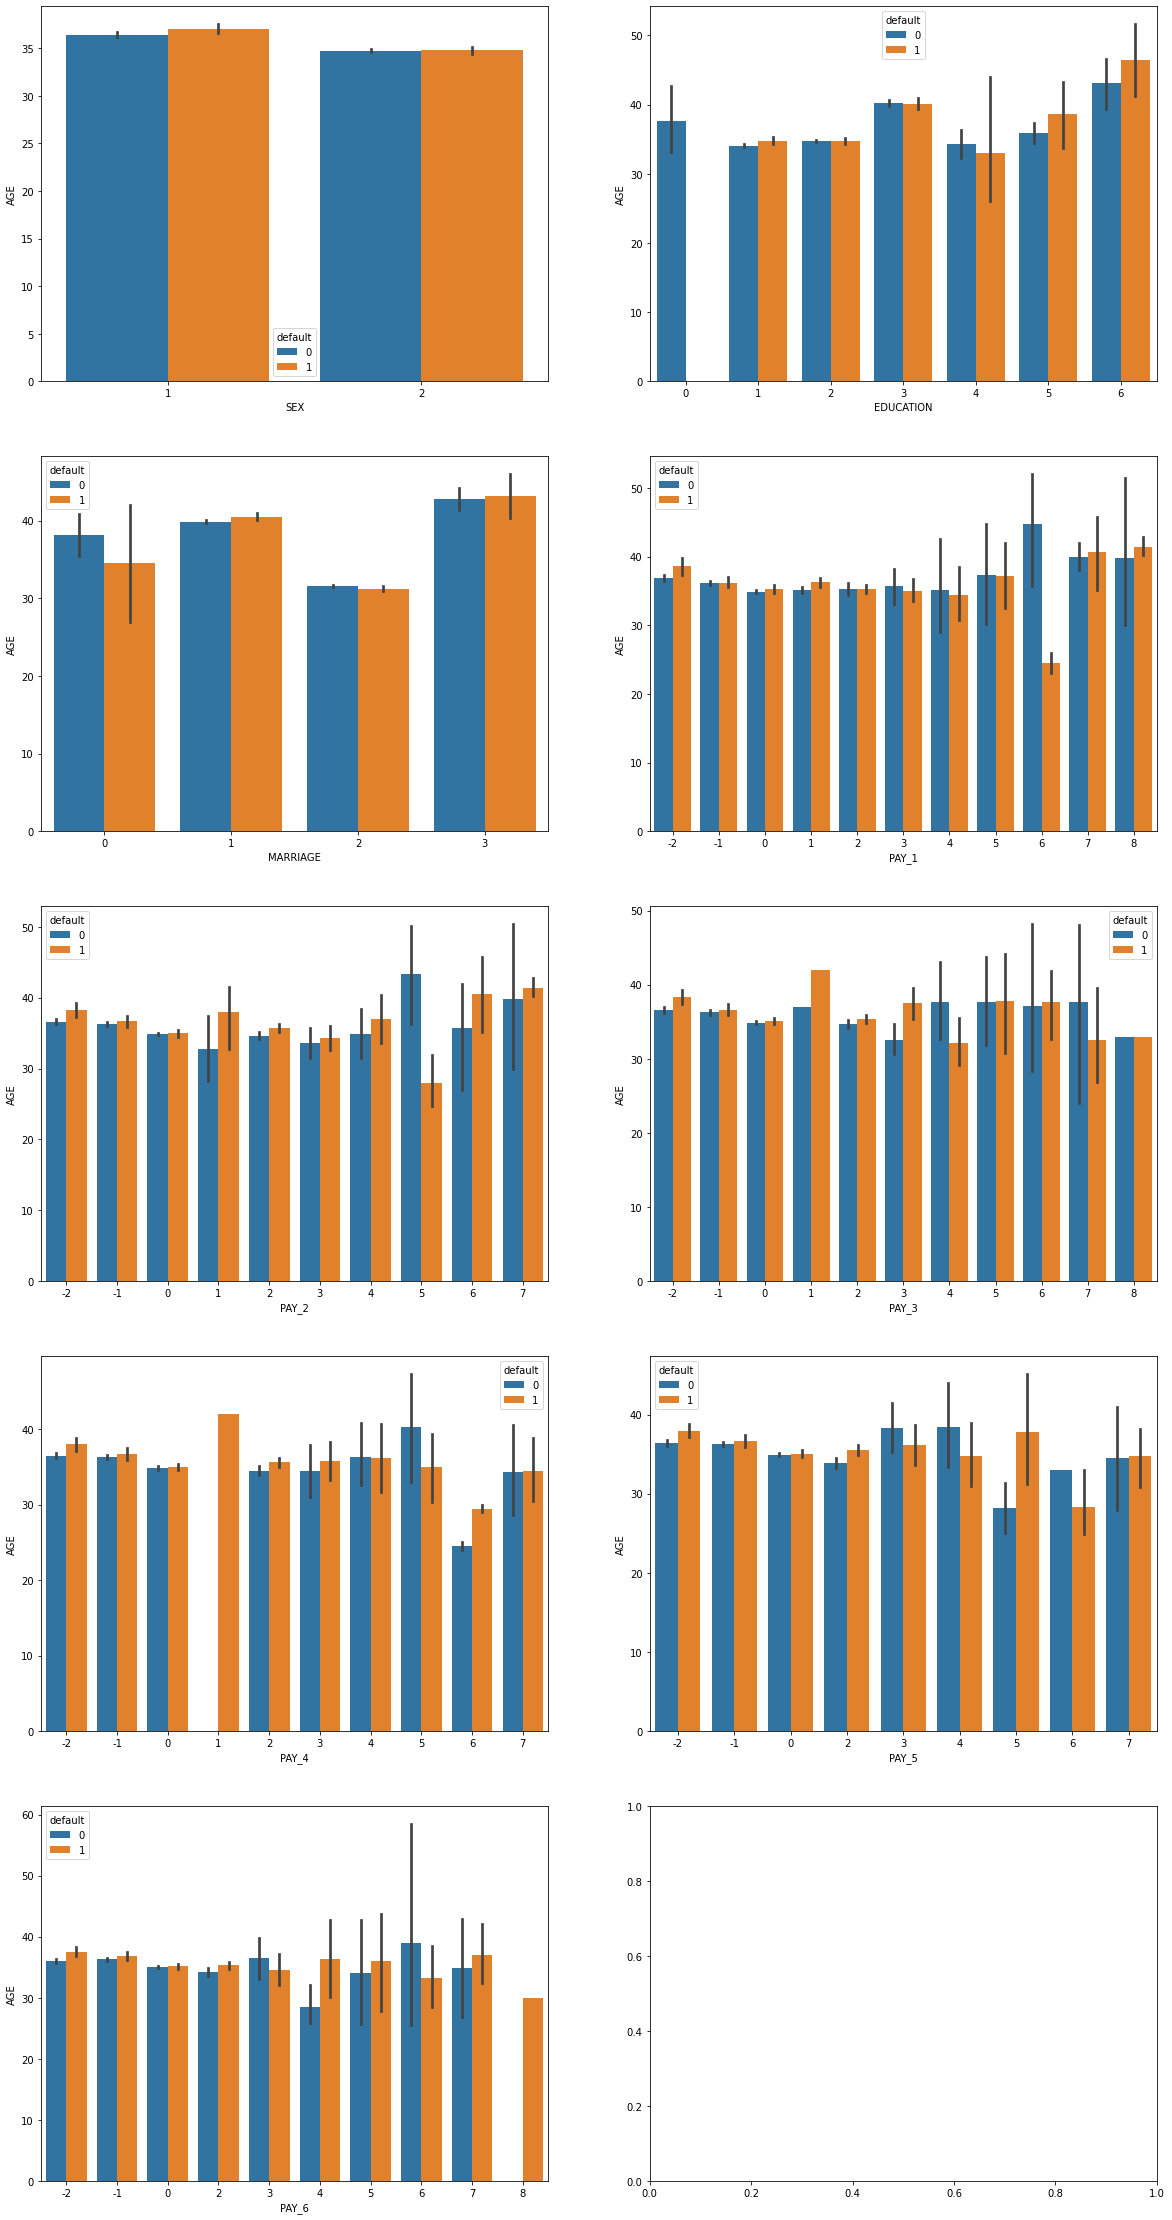

In [10]:
# Grafico 

ncols = 2 
nrows = int(np.ceil(len(data_train[var_categ].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
axs = ax.flatten()

for i,c in enumerate(var_categ):

    sns.barplot(data=data_train, x=c, y="AGE", hue="default", ax = axs[i])
    #axs[i].set_title("grafica variable: {}".format(c))

Categorias que no estan documentadas, hay que determinar que hacer con dichos casos

In [11]:
data_train[var_cont].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000
mean,167264.424189,35.484348,51039.577322,49032.712329,4.697210e+04,43227.804521,40361.107141,39000.315173,5620.931299,5.956795e+03,5219.914110,4914.133184,4849.605917,5114.730923
std,129732.975552,9.197402,73530.921163,71027.002951,6.982228e+04,64343.973659,60694.859580,59465.813171,16639.820942,2.413026e+04,17755.914586,16280.270269,15692.645031,17024.830375
min,10000.000000,21.000000,-154973.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3516.000000,2910.000000,2.642000e+03,2311.500000,1721.500000,1239.500000,1000.000000,8.270000e+02,390.000000,300.000000,240.500000,148.000000
50%,140000.000000,34.000000,22291.000000,21127.000000,2.005700e+04,19048.000000,18135.000000,17124.000000,2102.000000,2.011000e+03,1781.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.500000,66972.500000,64244.000000,6.034900e+04,54446.500000,50481.000000,49563.000000,5000.000000,5.000000e+03,4497.500000,4007.000000,4030.000000,4000.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,443001.000000


Cuando la variable BILL_AMT{n} tiene un valor negativo indica que la deuda tiene un saldo a favor, por lo que se puede interpretar que se pago mas de la cuenta.

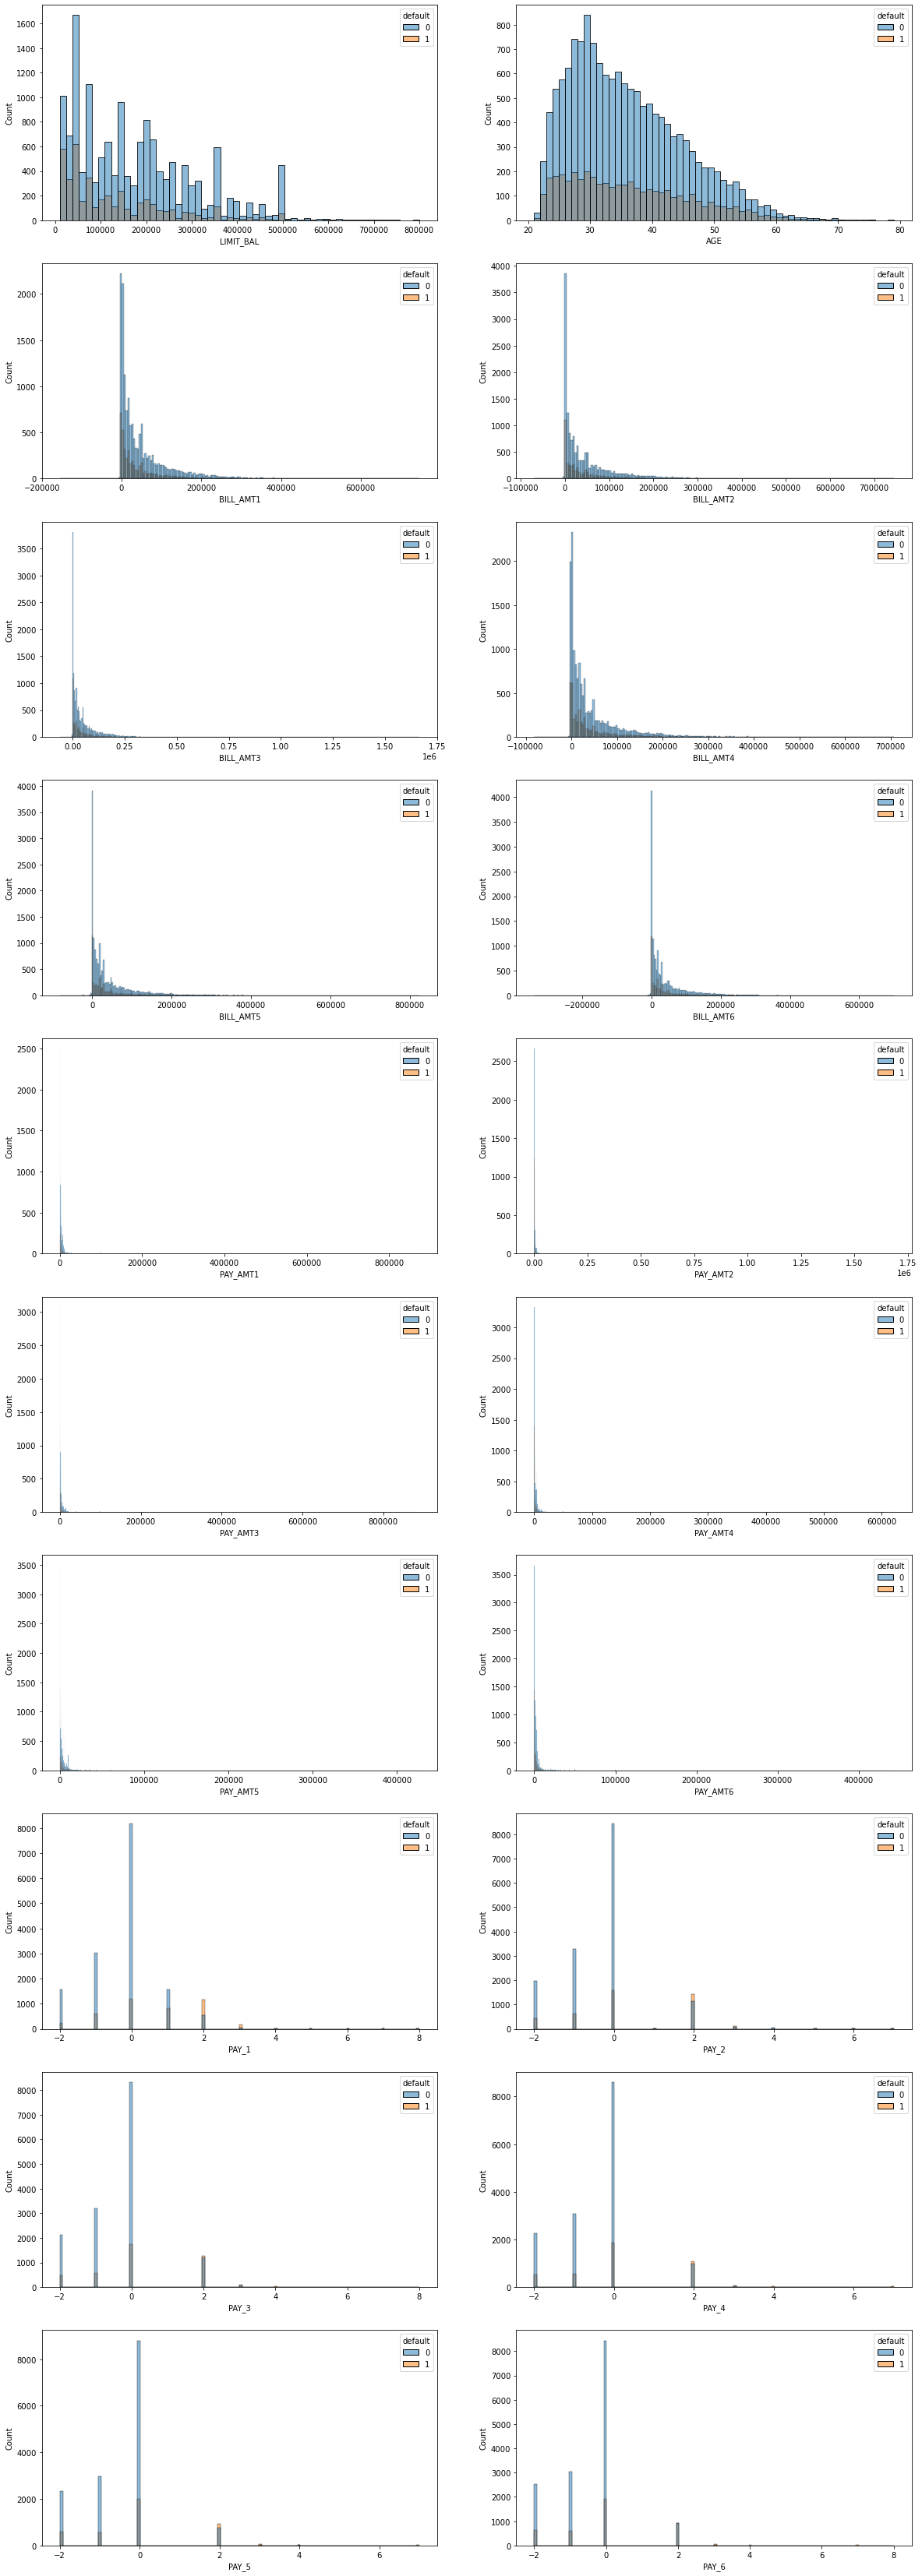

In [12]:
new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    #sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

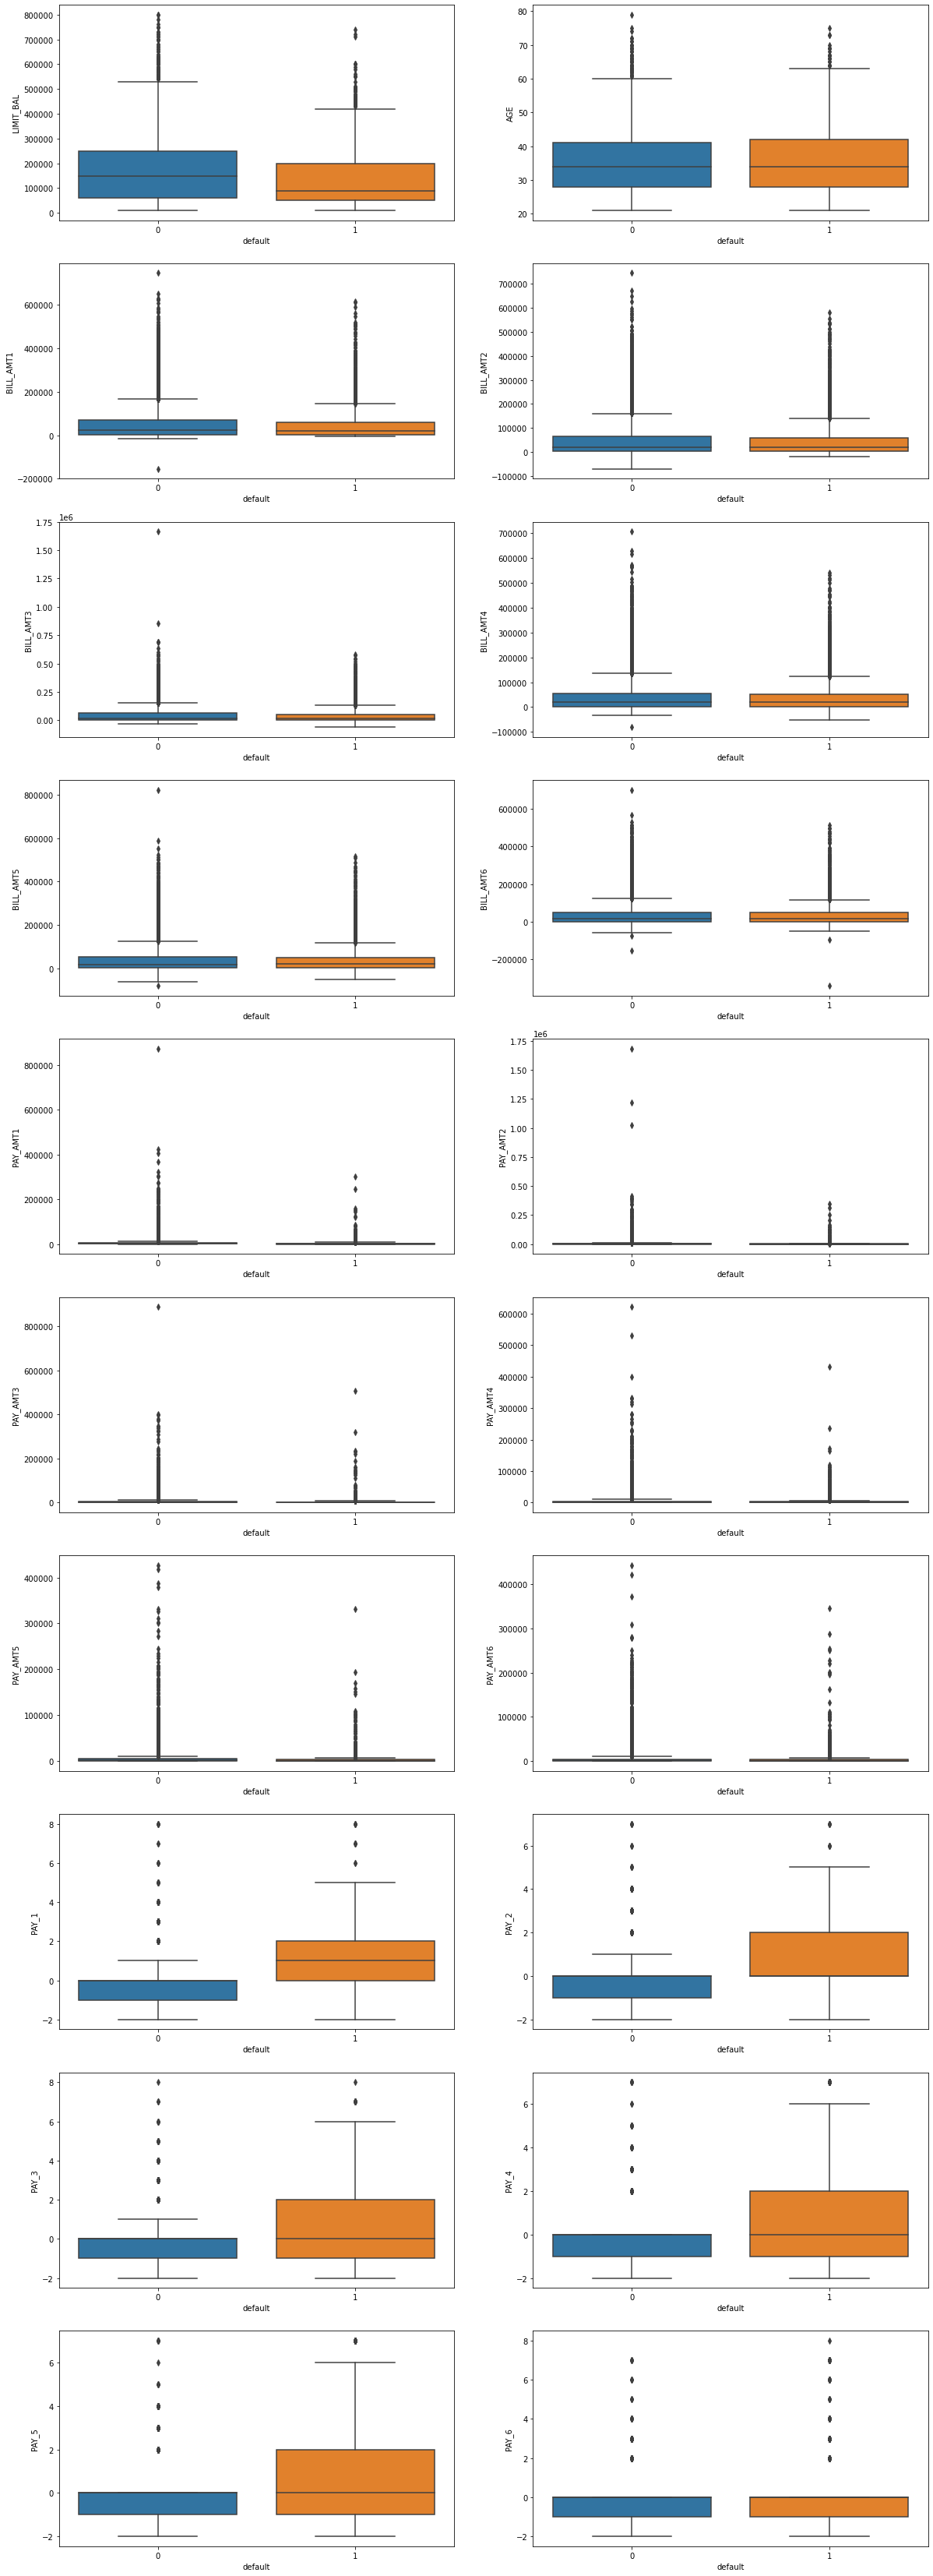

In [13]:
new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    #sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

<AxesSubplot:>

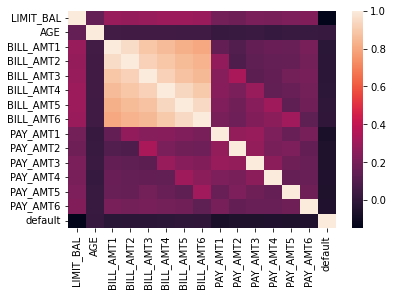

In [14]:
sns.heatmap(data_train[var_cont+["default"]].corr())

Existe alta correlacion entre las variables BILL_AMT{n}, esto puede ser debido a la consistencia en el comportamiento de un cliente por lo que el valor que paga un cliente en un mes quizas sea similar al valor que debe pagar en los meses posteriores o anteriores

# Transformacion de varaibles

Se transformará la variable de BILL_AMT{n} en dos variables una binaria que indica si el valor es negativo (saldo a favor) y otra que tendrá el valor del saldo a favor.

aplicar logaritmo a las variables que tienen skewness

In [15]:
def transform_x(X_in):
    
    for i in np.arange(1,6):
        X_in["DIFF_BILL_PAY_{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i+1)] - X_in["PAY_AMT{i}".format(i=i)]
        #X_in["DIFF_BILL_PAY_{i}".format(i=i)] = np.log(X_in["DIFF_BILL_PAY_{i}".format(i=i)]+1)
        X_in["CHANGE_PAY_STATUS_{i}".format(i=i)] = X_in["PAY_{i}".format(i=i)] - X_in["PAY_{i}".format(i=i+1)]
    
    for i in np.arange(1,7):
        X_in["IS_REFUND{i}".format(i=i)] = (X_in["BILL_AMT{i}".format(i = i)] < 0).astype(int)
        X_in["REFUND_AMT{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i)].apply(lambda x : x*-1 if x < 0 else 0)
        X_in["IS_BILLED{i}".format(i=i)] = (X_in["BILL_AMT{i}".format(i = i)] != 0).astype(int)
        
        X_in["POS_BILL_AMT{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i)].apply(lambda x : x if x > 0 else 0)
        X_in = X_in.drop(columns="BILL_AMT{i}".format(i=i))

        X_in["DEFAULT_ON_{i}".format(i=i)] = (X_in["PAY_{i}".format(i=i)] > 0).astype(int)


    X_in["PROPORTION_BILL_LIMIT"] = X_in["POS_BILL_AMT1"] / X_in["LIMIT_BAL"]
    X_in["PROPORTION_BILL_PAYED"] = X_in["PAY_AMT1"] / (X_in["POS_BILL_AMT2"]+1)
    
    

    # logaritmo
    X_in["LIMIT_BAL"] = np.log(X_in["LIMIT_BAL"] + 1)
    X_in["AGE"] = np.log(X_in["AGE"] + 1)    
    X_in["PROPORTION_BILL_LIMIT"] = np.log(X_in["PROPORTION_BILL_LIMIT"] + 1)
    X_in["PROPORTION_BILL_PAYED"] = np.log(X_in["PROPORTION_BILL_PAYED"] + 1)

    for i in np.arange(1,7):
        X_in["REFUND_AMT{i}".format(i=i)] = np.log(X_in["REFUND_AMT{i}".format(i=i)] + 1)
        X_in["POS_BILL_AMT{i}".format(i=i)] = np.log(X_in["POS_BILL_AMT{i}".format(i=i)] + 1)
        X_in["PAY_AMT{i}".format(i = i)] = np.log(X_in["PAY_AMT{i}".format(i = i)] + 1)

    # feature engineering

    X_in["CONSECUTIVE_DEFAULTS"] = X_in[["DEFAULT_ON_{i}".format(i=x) for x in np.arange(2,7)]].sum(axis=1)

    X_in["MEAN_BILL_AMT"] = X_in[["POS_BILL_AMT{i}".format(i=x) for x in np.arange(2,7)]].mean(axis=1)
    
    c = X_in["MEAN_BILL_AMT"] != 0
    X_in["TREND_BILL_AMT"] = 0
    X_in.loc[c,"TREND_BILL_AMT"] = (X_in.loc[c,"POS_BILL_AMT1"]/X_in.loc[c,"MEAN_BILL_AMT"])

    X_in["TREND_BILL_AMT"] = np.log(X_in["TREND_BILL_AMT"] + 1)
    
    X_in["MEAN_PAY_AMT"] = X_in[["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)]].mean(axis=1)
    c = X_in["MEAN_PAY_AMT"] != 0
    X_in["TREND_PAY_AMT"] = 0
    X_in.loc[c,"TREND_PAY_AMT"] = X_in.loc[c,"PAY_AMT1"]/X_in.loc[c,"MEAN_PAY_AMT"]

    X_in["TREND_PAY_AMT"] = np.log(X_in["TREND_PAY_AMT"] + 1)

    #X_in = X_in.drop(columns=["MEAN_BILL_AMT","MEAN_PAY_AMT"])  

    c = X_in["EDUCATION"].isin([0,5,6])
    X_in.loc[c,"EDUCATION"] = 0


    return X_in

XTrain_transform = transform_x(XTrain)
XTest_transform = transform_x(XTest)

In [16]:
from sklearn.preprocessing import OneHotEncoder

# get dummies
col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]

encoder = OneHotEncoder(drop='first',handle_unknown='ignore',
                        categories=[[0, 1, 2, 3],
                                    [0, 1, 2, 3, 4],
                                    [1, 2],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8]])

encoder.fit(XTrain_transform[col_dummies])

XTrain_transform = pd.concat([XTrain_transform,pd.DataFrame(encoder.transform(XTrain_transform[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = XTrain_transform.index)], axis = 1)
#XTrain_transform = XTrain_transform.drop(columns=col_dummies)
XTest_transform = pd.concat([XTest_transform,pd.DataFrame(encoder.transform(XTest_transform[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = XTest_transform.index)], axis = 1)
#XTest_transform = XTest_transform.drop(columns=col_dummies)

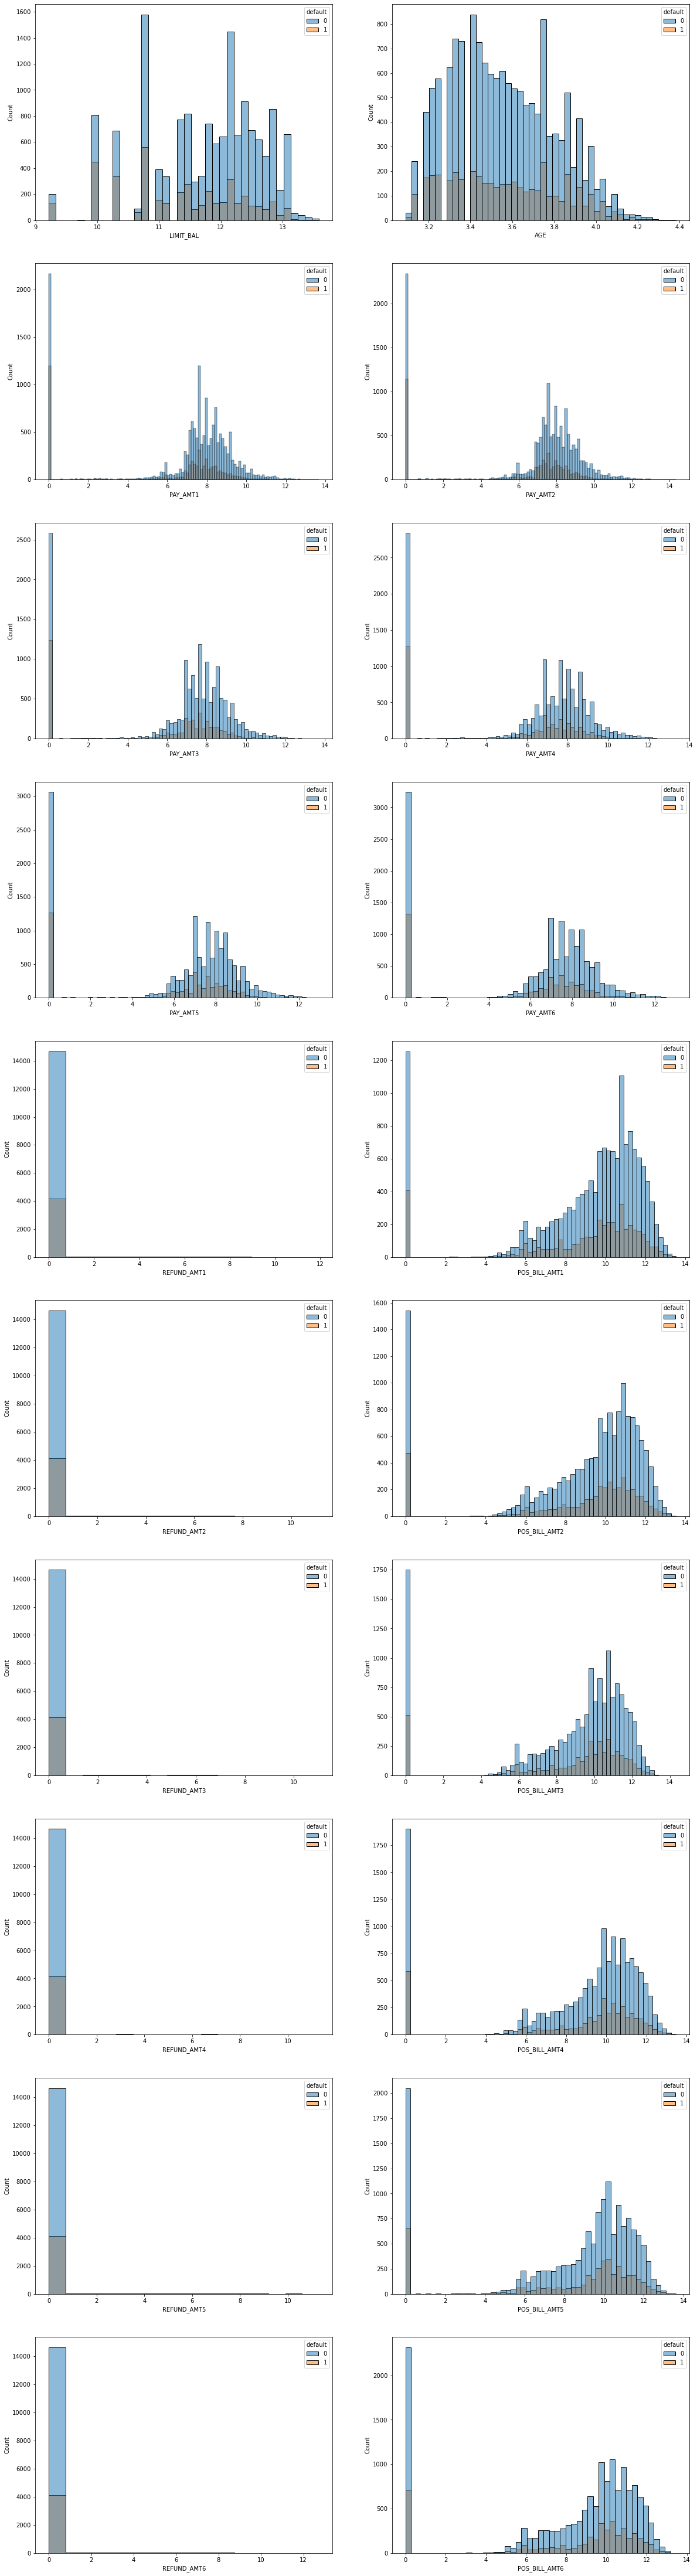

In [17]:
data_train = pd.concat([XTrain_transform,yTrain],axis=1)

var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
            'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6']
# 'PROPORTION_BILL_PAYED'

new_var_cont = var_cont

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 80))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    #sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

<AxesSubplot:>

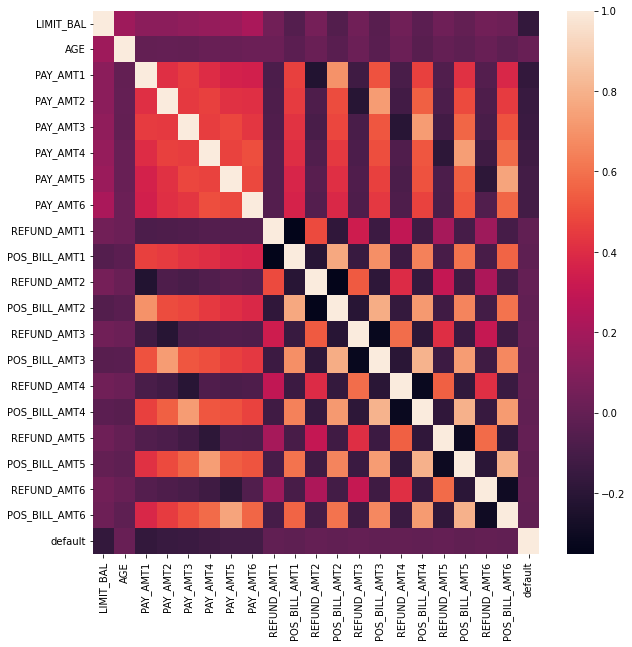

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_train[var_cont+["default"]].corr(), ax=ax)

In [19]:
# XTrain_back = XTrain_transform.copy()
# XTrain_transform = XTrain_transform.drop(columns=["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)])
# XTrain_transform = XTrain_transform.drop(columns=["PAY_{i}".format(i=x) for x in np.arange(1,7)])


# XTest_back = XTest_transform.copy()
# XTest_transform = XTest_transform.drop(columns=["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)])
# XTest_transform = XTest_transform.drop(columns=["PAY_{i}".format(i=x) for x in np.arange(1,7)])

In [20]:
XTrain_transform.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,...,19199.000000,19199.000000,19199.0,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000
mean,11.660909,1.605604,1.797698,1.553675,3.566577,-0.022501,-0.132403,-0.162300,-0.219334,-0.266003,...,0.189697,0.539872,0.0,0.095005,0.005729,0.001458,0.000469,0.000833,0.001302,0.000052
std,0.942794,0.488733,0.733333,0.521565,0.244200,1.123722,1.195179,1.197548,1.169226,1.135302,...,0.392072,0.498421,0.0,0.293229,0.075478,0.038162,0.021647,0.028857,0.036063,0.007217
min,9.210440,1.000000,0.000000,0.000000,3.091042,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.819798,1.000000,1.000000,1.000000,3.367296,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.849405,2.000000,2.000000,2.000000,3.555348,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.388398,2.000000,2.000000,2.000000,3.749435,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.592368,2.000000,4.000000,3.000000,4.382027,8.000000,7.000000,8.000000,7.000000,7.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Rebalanceo

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=7, k_neighbors=3,sampling_strategy=0.35)
XTrain_rebalanced, yTrain_rebalanced = sm.fit_resample(XTrain_transform, yTrain)

In [22]:
pd.DataFrame(yTrain).reset_index().groupby("default").count()

,index
default,
0,14978
1,4221


In [23]:
pd.DataFrame(yTrain_rebalanced).reset_index().groupby("default").count()

,index
default,
0,14978
1,5242


## Seleccion de variables

In [24]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

### Metodo filtrado

Text(0, 0.5, 'MI scores')

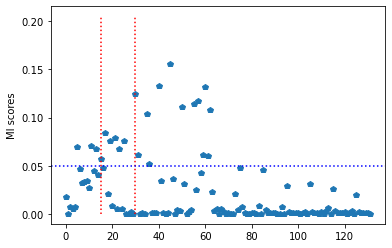

In [25]:
mu_inf=mutual_info_regression(XTrain_transform, yTrain,discrete_features=True,n_neighbors=4)

plt.plot(mu_inf,'p')
plt.vlines(x=[15,30],ymin=0,ymax=np.max(mu_inf)+0.05,ls=':',colors='r')
plt.axhline(y=0.05,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')

In [26]:
select_var_filtrado = XTrain_transform.columns[mu_inf > 0]
select_var_filtrado

XTrain_transform_filtrado = XTrain_transform[select_var_filtrado]
XTest_transform_filtrado = XTest_transform[select_var_filtrado]

In [27]:
select_var_filtrado.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DIFF_BILL_PAY_1', 'CHANGE_PAY_STATUS_1', 'DIFF_BILL_PAY_2',
       'CHANGE_PAY_STATUS_2', 'DIFF_BILL_PAY_3', 'CHANGE_PAY_STATUS_3',
       'DIFF_BILL_PAY_4', 'CHANGE_PAY_STATUS_4', 'DIFF_BILL_PAY_5',
       'CHANGE_PAY_STATUS_5', 'IS_REFUND1', 'REFUND_AMT1',
       'POS_BILL_AMT1', 'DEFAULT_ON_1', 'IS_REFUND2', 'REFUND_AMT2',
       'IS_BILLED2', 'POS_BILL_AMT2', 'DEFAULT_ON_2', 'IS_REFUND3',
       'REFUND_AMT3', 'IS_BILLED3', 'POS_BILL_AMT3', 'DEFAULT_ON_3',
       'IS_REFUND4', 'IS_BILLED4', 'POS_BILL_AMT4', 'DEFAULT_ON_4',
       'REFUND_AMT5', 'IS_BILLED5', 'POS_BILL_AMT5', 'DEFAULT_ON_5',
       'REFUND_AMT6', 'IS_BILLED6', 'POS_BILL_AMT6', 'DEFAULT_ON_6',
       'PROPORTION_BILL_LIMIT', 'PROPORTION_BILL_PAYED',
       'CONSECUTIVE_DEFAULTS', 'MEAN_BILL_AMT', 'TREND_BILL_AMT',

### Metodos de envoltura

In [28]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=0,max_depth = 2, n_estimators=200)  #se usa random Forest como el algoritmo predictivo
selector = RFE(estimator, n_features_to_select=114, step=1) #Se define step=1, pero lo puede cambiar para que sea más rápido
selector = selector.fit(XTrain_transform, yTrain) # esto puede tardar algunos minutos

#selector.support_  #Conjunto de variables seleccionadas

select_var_envoltura = XTrain_transform.columns[selector.support_]

XTrain_transform_envoltura = XTrain_transform[select_var_envoltura] 
XTest_transform_envoltura = XTest_transform[select_var_envoltura]

In [29]:
select_var_envoltura.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DIFF_BILL_PAY_1', 'CHANGE_PAY_STATUS_1', 'DIFF_BILL_PAY_2',
       'CHANGE_PAY_STATUS_2', 'DIFF_BILL_PAY_3', 'CHANGE_PAY_STATUS_3',
       'DIFF_BILL_PAY_4', 'CHANGE_PAY_STATUS_4', 'DIFF_BILL_PAY_5',
       'CHANGE_PAY_STATUS_5', 'IS_REFUND1', 'REFUND_AMT1', 'IS_BILLED1',
       'POS_BILL_AMT1', 'DEFAULT_ON_1', 'IS_REFUND2', 'REFUND_AMT2',
       'IS_BILLED2', 'POS_BILL_AMT2', 'DEFAULT_ON_2', 'REFUND_AMT3',
       'IS_BILLED3', 'DEFAULT_ON_3', 'IS_REFUND4', 'IS_BILLED4',
       'POS_BILL_AMT4', 'DEFAULT_ON_4', 'REFUND_AMT5', 'IS_BILLED5',
       'POS_BILL_AMT5', 'DEFAULT_ON_5', 'IS_REFUND6', 'REFUND_AMT6',
       'IS_BILLED6', 'POS_BILL_AMT6', 'DEFAULT_ON_6',
       'PROPORTION_BILL_LIMIT', 'PROPORTION_BILL_PAYED',
       'CONSECUTIVE_DEFAULTS', 'MEAN_BILL_AMT', 'TREND_BILL_AMT',
  

## PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
XTrain_transform.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DIFF_BILL_PAY_1', 'CHANGE_PAY_STATUS_1', 'DIFF_BILL_PAY_2',
       'CHANGE_PAY_STATUS_2', 'DIFF_BILL_PAY_3', 'CHANGE_PAY_STATUS_3',
       'DIFF_BILL_PAY_4', 'CHANGE_PAY_STATUS_4', 'DIFF_BILL_PAY_5',
       'CHANGE_PAY_STATUS_5', 'IS_REFUND1', 'REFUND_AMT1', 'IS_BILLED1',
       'POS_BILL_AMT1', 'DEFAULT_ON_1', 'IS_REFUND2', 'REFUND_AMT2',
       'IS_BILLED2', 'POS_BILL_AMT2', 'DEFAULT_ON_2', 'IS_REFUND3',
       'REFUND_AMT3', 'IS_BILLED3', 'POS_BILL_AMT3', 'DEFAULT_ON_3',
       'IS_REFUND4', 'REFUND_AMT4', 'IS_BILLED4', 'POS_BILL_AMT4',
       'DEFAULT_ON_4', 'IS_REFUND5', 'REFUND_AMT5', 'IS_BILLED5',
       'POS_BILL_AMT5', 'DEFAULT_ON_5', 'IS_REFUND6', 'REFUND_AMT6',
       'IS_BILLED6', 'POS_BILL_AMT6', 'DEFAULT_ON_6',
       'PROPORTION_BILL_LIMIT', 'PROPORTION_BILL_PAYED',
 

In [32]:
var_cont = ['LIMIT_BAL', 'AGE', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'REFUND_AMT1', 'POS_BILL_AMT1', 'REFUND_AMT2', 'POS_BILL_AMT2',
       'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
       'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6']

var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
            'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
            'PROPORTION_BILL_LIMIT','DIFF_BILL_PAY_1', 'DIFF_BILL_PAY_2',
            'DIFF_BILL_PAY_3',
            'DIFF_BILL_PAY_4', 'DIFF_BILL_PAY_5',
            'PROPORTION_BILL_PAYED']

n = XTrain_transform[var_cont].shape[1]
#n = 20
pca = PCA(n_components=20, random_state = 0)

pca.fit(XTrain_transform[var_cont])
XTrain_PCA = pca.transform(XTrain_transform[var_cont])
XTest_PCA = pca.transform(XTest_transform[var_cont])

In [33]:
n

29

In [34]:
pca.explained_variance_ratio_.sum()

0.9999999999350839

In [35]:
pca.explained_variance_ratio_.cumsum()

array([0.91406242, 0.96338575, 0.98226469, 0.99181809, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [36]:
cols_categ = [x for x in XTrain_transform.columns.values if x not in var_cont]

XTrain_PCA = pd.concat([pd.DataFrame(XTrain_PCA, index=XTrain_transform.index),XTrain_transform[cols_categ]], axis=1)
XTrain_PCA.columns = XTrain_PCA.columns.astype(str)
XTest_PCA = pd.concat([pd.DataFrame(XTest_PCA, index=XTest_transform.index),XTest_transform[cols_categ]], axis=1)
XTest_PCA.columns = XTest_PCA.columns.astype(str)

# MODELOS

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn import metrics


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC

In [38]:
def error_clasificacion(XTrain,yTrain,XTest,yTest,modelo="LDA"):
    modelos = {"LDA":LinearDiscriminantAnalysis(),
                "QDA" : QuadraticDiscriminantAnalysis(),
                "NBC" : GaussianNB(),
                "RegLog": LogisticRegression(random_state=0,max_iter=10000)}
    
    model = modelos[modelo]
    
    
    
    # train - predict de los modelos
    model.fit(XTrain, yTrain)
    predict=model.predict(XTest)
    predict_prob=model.predict_proba(XTest)


    error=0
    for i in range(0,len(yTest)):
        if(yTest.iloc[i]!=predict[i]):
            error+=1/len(yTest)
    print('El error de clasificación para {modelo} en la muestra de test es:{s}'.format(modelo=modelo,s=error))
    
    print(confusion_matrix(y_true=yTest, y_pred=predict))
    accuracy=accuracy_score(y_true=yTest, y_pred=predict)
    print(accuracy)
    precisionRegLog= precision_score(y_true=yTest.values, y_pred=predict)
    print(precisionRegLog)
    
    # curva roc para Train
    fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
    fpr, tpr, thresholds = roc_curve(yTrain, model.predict(XTrain))
    AUC_train=metrics.auc(fpr, tpr)
    ax[0].set_title('Curva ROC para el entrenamiento')
    ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_train)
    ax[0].legend(loc = 'lower right')
    ax[0].plot([0, 1], [0, 1],'r--')
    ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_xlabel('False Positive Rate')

    # curva roc para Test
    fpr, tpr, thresholds = roc_curve(yTest, predict)
    AUC_test=metrics.auc(fpr, tpr)
    ax[1].set_title('Curva ROC para el conjunto de prueba')
    ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_test)
    ax[1].legend(loc = 'lower right')
    ax[1].plot([0, 1], [0, 1],'r--')
    ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlabel('False Positive Rate')



    return AUC_train, AUC_test, error, model

In [39]:
def graficas_roc_test_train(Xtrain, yTrain, XTest, yTest, model, grafica=True):

    # Train
    prediccionMdl_Train = model.predict_proba(Xtrain)[:,1]
    fpr_train, tpr_train, thresholds = metrics.roc_curve(yTrain, prediccionMdl_Train, pos_label=1)
    AUC_train=metrics.auc(fpr_train, tpr_train)
    

    # TEST
    prediccionMdl_Test = model.predict_proba(XTest)[:,1]
    fpr_test, tpr_test, thresholds = metrics.roc_curve(yTest, prediccionMdl_Test, pos_label=1)
    AUC_test = metrics.auc(fpr_test, tpr_test)
    

    if grafica:

        fig, ax = plt.subplots(ncols=2, figsize=(16, 8))    
        # Train
        ax[0].set_title('Receiver Operating Characteristic')
        ax[0].plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % AUC_train)
        ax[0].legend(loc = 'lower right')
        ax[0].plot([0, 1], [0, 1],'r--')
        ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
        ax[0].set_ylabel('True Positive Rate')
        ax[0].set_xlabel('False Positive Rate')

        # Test
        ax[1].set_title('Receiver Operating Characteristic')
        ax[1].plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % AUC_test)
        ax[1].legend(loc = 'lower right')
        ax[1].plot([0, 1], [0, 1],'r--')
        ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
        ax[1].set_ylabel('True Positive Rate')
        ax[1].set_xlabel('False Positive Rate')
        
    print("AUC Train: {}".format(AUC_train))
    print("AUC Test: {}".format(AUC_test))

    return AUC_train, AUC_test


def metricas_modelo(XTest, yTest, model):
    
    predict=model.predict(XTest)
    error=0
    for i in range(0,len(yTest)):
        if(yTest.iloc[i]!=predict[i]):
            error+=1/len(yTest)
    print('El error de clasificación para modelo en la muestra de test es:{s}'.format(s=error))
    
    print(confusion_matrix(y_true=yTest, y_pred=predict))
    accuracy = accuracy_score(y_true=yTest, y_pred=predict)
    print("accuracy : {}".format(accuracy))
    precision = precision_score(y_true=yTest.values, y_pred=predict)
    print("precision : {}".format(precision))

    return accuracy, precision, error

# Gradient Boosting

AUC Train: 0.792809988488526
AUC Test: 0.7897359913793103
El error de clasificación para modelo en la muestra de test es:0.18000000000000246
[[3544  168]
 [ 696  392]]
accuracy : 0.82
precision : 0.7


(0.82, 0.7, 0.18000000000000246)

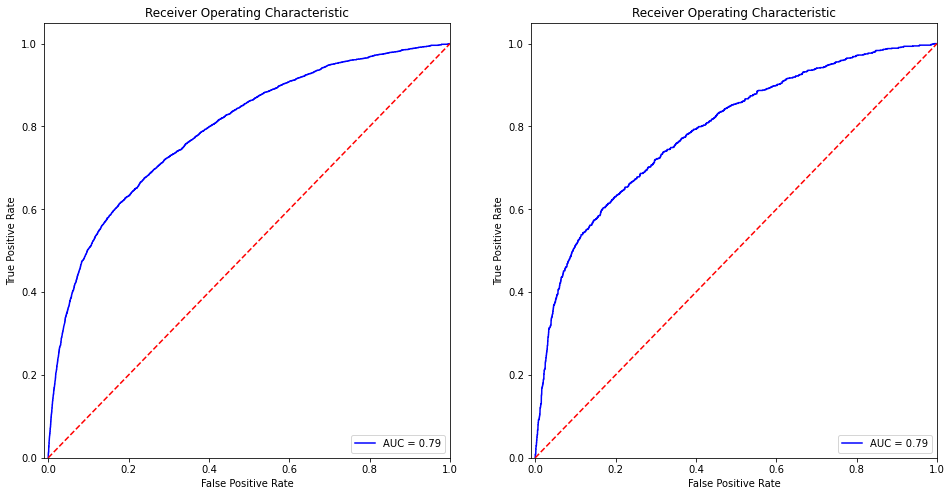

In [40]:
clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000)
clfGB.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB)
metricas_modelo(XTest_transform, yTest, clfGB)

AUC Train: 0.7939549513494782
AUC Test: 0.789131210977117
El error de clasificación para modelo en la muestra de test es:0.18062500000000248
[[3548  164]
 [ 703  385]]
accuracy : 0.819375
precision : 0.7012750455373407


(0.819375, 0.7012750455373407, 0.18062500000000248)

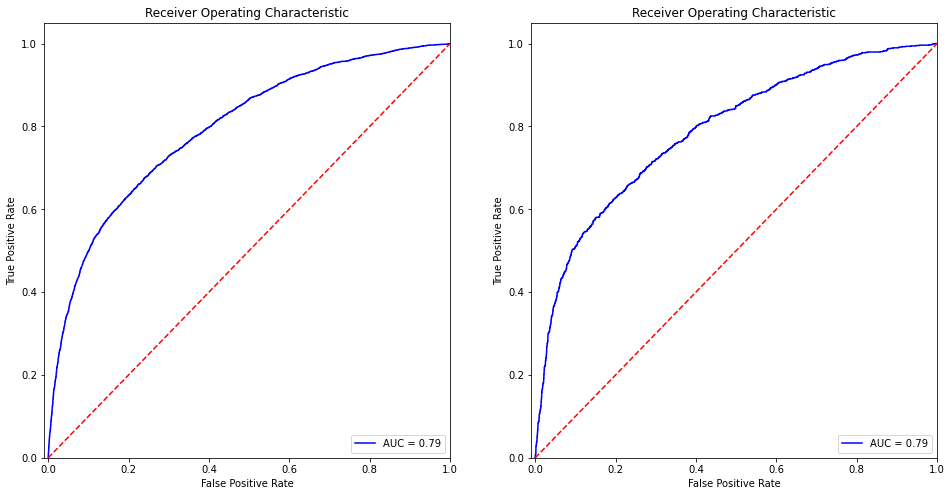

In [41]:
clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clfGB.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB)
metricas_modelo(XTest_transform, yTest, clfGB)

AUC Train: 0.7930168701349518
AUC Test: 0.7873337070550203
El error de clasificación para modelo en la muestra de test es:0.18041666666666914
[[3553  159]
 [ 707  381]]
accuracy : 0.8195833333333333
precision : 0.7055555555555556


(0.8195833333333333, 0.7055555555555556, 0.18041666666666914)

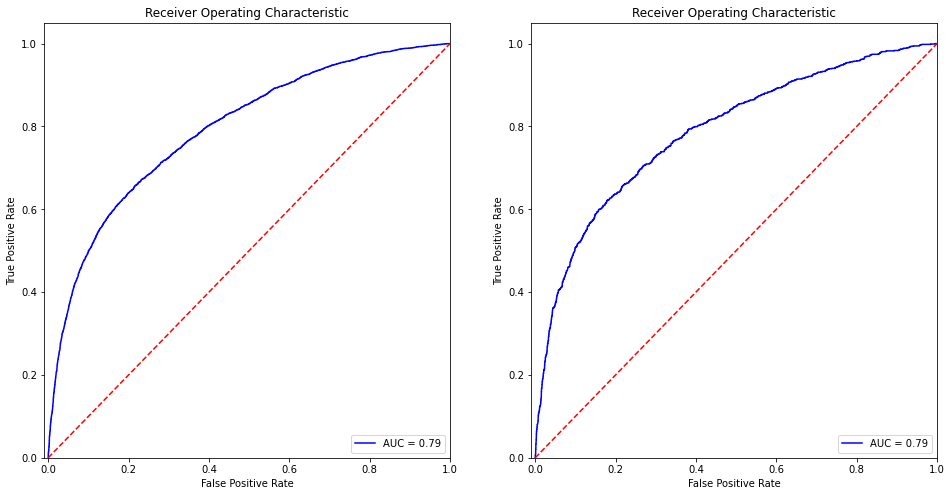

In [42]:
clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clfGB.fit(XTrain_PCA, yTrain)

graficas_roc_test_train(XTrain_PCA, yTrain, XTest_PCA, yTest, clfGB)
metricas_modelo(XTest_PCA, yTest, clfGB)

AUC Train: 0.812239179573459
AUC Test: 0.7811624708814022
El error de clasificación para modelo en la muestra de test es:0.18166666666666917
[[3526  186]
 [ 686  402]]
accuracy : 0.8183333333333334
precision : 0.6836734693877551


(0.8183333333333334, 0.6836734693877551, 0.18166666666666917)

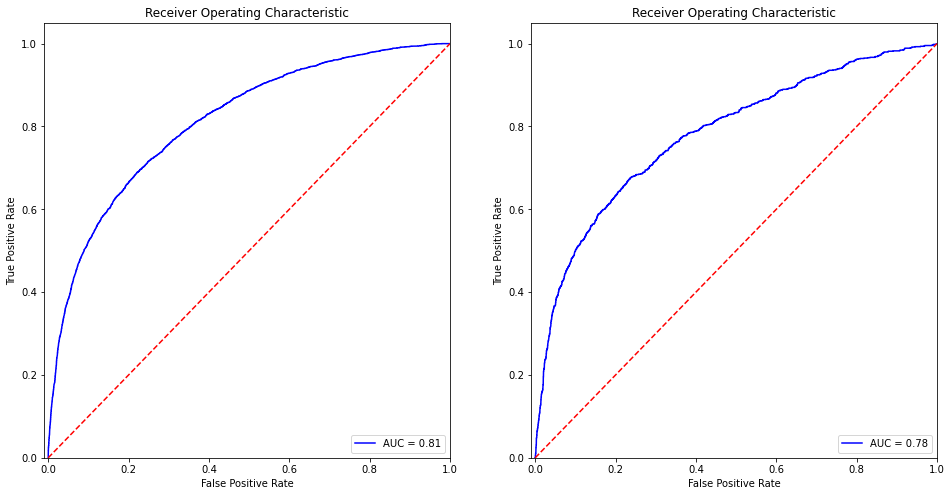

In [43]:
clfGB= GradientBoostingClassifier(learning_rate=0.5,max_depth=1,random_state=0,n_estimators=500, loss='exponential')
clfGB.fit(XTrain_PCA, yTrain)

graficas_roc_test_train(XTrain_PCA, yTrain, XTest_PCA, yTest, clfGB)
metricas_modelo(XTest_PCA, yTest, clfGB)

### Iteracion PCA

In [44]:
n = XTrain_transform[var_cont].shape[1]

acc_arr = []
AUC_train_arr = []
AUC_test_arr = []
precision_arr = []
error_clasifica_arr  = []

for i in np.arange(1,n,1):
    print(i)
    var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
                'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
                'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
                'PROPORTION_BILL_LIMIT','DIFF_BILL_PAY_1', 'DIFF_BILL_PAY_2',
                'DIFF_BILL_PAY_3',
                'DIFF_BILL_PAY_4', 'DIFF_BILL_PAY_5',
                'PROPORTION_BILL_PAYED']

    
    #n = 20
    pca = PCA(n_components=i, random_state = 0)

    pca.fit(XTrain_transform[var_cont])
    XTrain_PCA = pca.transform(XTrain_transform[var_cont])
    XTest_PCA = pca.transform(XTest_transform[var_cont])

    cols_categ = [x for x in XTrain_transform.columns.values if x not in var_cont]

    XTrain_PCA = pd.concat([pd.DataFrame(XTrain_PCA, index=XTrain_transform.index),XTrain_transform[cols_categ]], axis=1)
    XTrain_PCA.columns = XTrain_PCA.columns.astype(str)
    XTest_PCA = pd.concat([pd.DataFrame(XTest_PCA, index=XTest_transform.index),XTest_transform[cols_categ]], axis=1)
    XTest_PCA.columns = XTest_PCA.columns.astype(str)


    clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
    clfGB.fit(XTrain_PCA, yTrain)

    AUC_train, AUC_test = graficas_roc_test_train(XTrain_PCA, yTrain, XTest_PCA, yTest, clfGB,grafica=False)
    accuracy, precision, error = metricas_modelo(XTest_PCA, yTest, clfGB)

    acc_arr.append(accuracy)
    AUC_train_arr.append(AUC_train)
    AUC_test_arr.append(AUC_test)
    precision_arr.append(precision)
    error_clasifica_arr.append(error)

1
AUC Train: 0.7777767575655224
AUC Test: 0.774692372908215
El error de clasificación para modelo en la muestra de test es:0.18166666666666917
[[3553  159]
 [ 713  375]]
accuracy : 0.8183333333333334
precision : 0.702247191011236
2
AUC Train: 0.7794794127335587
AUC Test: 0.7756165665013312
El error de clasificación para modelo en la muestra de test es:0.18208333333333585
[[3548  164]
 [ 710  378]]
accuracy : 0.8179166666666666
precision : 0.6974169741697417
3
AUC Train: 0.7802815130990983
AUC Test: 0.7750281281693713
El error de clasificación para modelo en la muestra de test es:0.18208333333333585
[[3552  160]
 [ 714  374]]
accuracy : 0.8179166666666666
precision : 0.700374531835206
4
AUC Train: 0.7811688763198739
AUC Test: 0.7744112150180654
El error de clasificación para modelo en la muestra de test es:0.18500000000000258
[[3544  168]
 [ 720  368]]
accuracy : 0.815
precision : 0.6865671641791045
5
AUC Train: 0.7813338897207178
AUC Test: 0.7745554461682302
El error de clasificación p

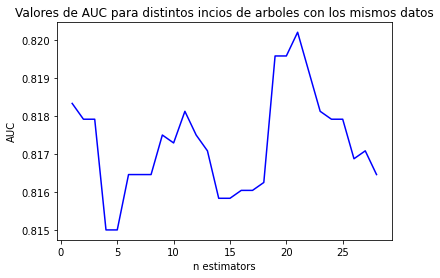

In [45]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n,1), acc_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [46]:
np.argmax(acc_arr)

20

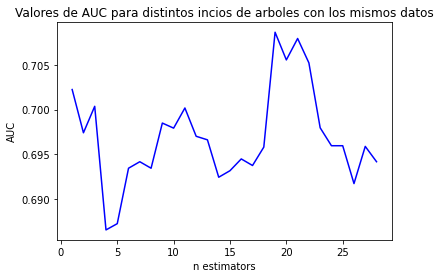

In [47]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n,1), precision_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

# Submission

In [48]:
XTrain_PCA.columns.values

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'CHANGE_PAY_STATUS_1',
       'CHANGE_PAY_STATUS_2', 'CHANGE_PAY_STATUS_3',
       'CHANGE_PAY_STATUS_4', 'CHANGE_PAY_STATUS_5', 'IS_REFUND1',
       'IS_BILLED1', 'DEFAULT_ON_1', 'IS_REFUND2', 'IS_BILLED2',
       'DEFAULT_ON_2', 'IS_REFUND3', 'IS_BILLED3', 'DEFAULT_ON_3',
       'IS_REFUND4', 'IS_BILLED4', 'DEFAULT_ON_4', 'IS_REFUND5',
       'IS_BILLED5', 'DEFAULT_ON_5', 'IS_REFUND6', 'IS_BILLED6',
       'DEFAULT_ON_6', 'CONSECUTIVE_DEFAULTS', 'MEAN_BILL_AMT',
       'MEAN_PAY_AMT', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'SEX_2', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3',
       'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY

In [49]:
submission_df = pd.read_excel("data/Test.xlsx")
submission_df = submission_df.rename(columns={"default.payment.next.month":"default", "PAY_0":"PAY_1"})

Xsubmission = transform_x(submission_df)
var_cont = ['LIMIT_BAL', 'AGE', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'REFUND_AMT1', 'POS_BILL_AMT1', 'REFUND_AMT2', 'POS_BILL_AMT2',
       'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
       'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6']


var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
            'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
            'PROPORTION_BILL_LIMIT','DIFF_BILL_PAY_1', 'DIFF_BILL_PAY_2',
            'DIFF_BILL_PAY_3',
            'DIFF_BILL_PAY_4', 'DIFF_BILL_PAY_5',
            'PROPORTION_BILL_PAYED']

Xsubmission_PCA = pca.transform(Xsubmission[var_cont])
cols_categ = [x for x in Xsubmission.columns.values if x not in var_cont]
Xsubmission = pd.concat([pd.DataFrame(Xsubmission_PCA, index=Xsubmission.index),Xsubmission[cols_categ]], axis=1)
Xsubmission.columns = Xsubmission.columns.astype(str)

col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]
Xsubmission = pd.concat([Xsubmission,pd.DataFrame(encoder.transform(Xsubmission[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = Xsubmission.index)], axis = 1)
#Xsubmission = Xsubmission.drop(columns=col_dummies)


prediccion_submission = clfGB.predict_proba(Xsubmission)[:,1]

In [ ]:
pd.DataFrame()
export_df = Xsubmission
export_df["Probability"] = prediccion_submission

export_df = export_df["Probability"].reset_index()
export_df.columns = ["Id","Probability"]
export_df["Id"] = export_df["Id"]+1

export_df.to_csv("data/submission.csv",index=False)